# California ACT SAT Analysis

## US Census - Median Income (3/3)

### Contents:
- [Data Import](#Data-Import)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [Data Dictionary](#Data-Dictionary)

## Data Import

### All libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

The US Census provides data on median income in California counties for the past 12 months in 2019 (S1903). This external data was collected to examine the relationship between SAT and ACT scores, income levels, and identify any potential correlations between them.

In [2]:
# Read in data
df = pd.read_csv('../data/original/median_income_2019_ca.csv')
df.head()

,Label (Grouping),"Alameda County, California!!Number!!Estimate","Alameda County, California!!Percent Distribution!!Estimate","Alameda County, California!!Median income (dollars)!!Estimate","Butte County, California!!Number!!Estimate","Butte County, California!!Percent Distribution!!Estimate","Butte County, California!!Median income (dollars)!!Estimate","Contra Costa County, California!!Number!!Estimate","Contra Costa County, California!!Percent Distribution!!Estimate","Contra Costa County, California!!Median income (dollars)!!Estimate",...,"Tulare County, California!!Median income (dollars)!!Estimate","Ventura County, California!!Number!!Estimate","Ventura County, California!!Percent Distribution!!Estimate","Ventura County, California!!Median income (dollars)!!Estimate","Yolo County, California!!Number!!Estimate","Yolo County, California!!Percent Distribution!!Estimate","Yolo County, California!!Median income (dollars)!!Estimate","Yuba County, California!!Number!!Estimate","Yuba County, California!!Percent Distribution!!Estimate","Yuba County, California!!Median income (dollars)!!Estimate"
0,HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATIN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Households,"585,632","585,632","108,322","77,651","77,651","62,563","399,792","399,792","107,135",...,"57,692","268,524","268,524","92,236","76,075","76,075","71,417","26,827","26,827","58,765"
2,One race--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"262,721",44.9%,"117,142","67,091",86.4%,"63,948","241,445",60.4%,"115,561",...,"58,244","228,805",85.2%,"91,546","57,100",75.1%,"75,378","23,183",86.4%,"58,182"
4,Black or African American,"70,296",12.0%,"56,404",N,N,N,"37,617",9.4%,"75,748",...,"40,589","5,475",2.0%,"90,678",N,N,"80,836",N,N,"55,065"


## Data Cleaning

The raw data contained numerous irrelevant columns, which required data cleaning processes. These include removing `number` and `percent distribution` columns for each county, deleting the first column, and simplifying the remaining column names to only include county names. The resulting cleaned data frame was named `df`, and it was created to include only the households median income (dollars) data for each county.

In [3]:
# Reference: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
# Drop 'percent distribution' columns for each county
df = df[df.columns.drop(list(df.filter(regex='Percent')))]

# Drop 'Number' columns for each county
df = df[df.columns.drop(list(df.filter(regex='Number')))]

# Delete first column (HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATIN...)
# Reference: https://sparkbyexamples.com/pandas/pandas-drop-first-column-from-dataframe/
df = df.drop(df.columns[0], axis=1)

In [4]:
# Reference https://vintech.medium.com/how-to-delete-words-from-column-name-using-python-2f2779e1e7de
# Delete " County, California!!Median income (dollars)!!Estimate" words from each column names
words = [" County, California!!Median income (dollars)!!Estimate"]
c = list()
c = df.columns.tolist()
for i in range(len(c)):
    for word in words: 
        c[i] = c[i].replace(word, '')
df.columns = c

# Regiew data
df.head(2)

,Alameda,Butte,Contra Costa,El Dorado,Fresno,Humboldt,Imperial,Kern,Kings,Lake,...,Shasta,Solano,Sonoma,Stanislaus,Sutter,Tehama,Tulare,Ventura,Yolo,Yuba
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"108,322","62,563","107,135","87,059","57,518","51,662","48,472","53,067","58,453","47,138",...,"63,091","86,652","87,828","63,037","62,777","53,475","57,692","92,236","71,417","58,765"


In [5]:
# Create a new dataframe     
df = pd.DataFrame(df.loc[1,:])

# Rename column name 
df.rename(columns = {1: 'household_median_income_2019'}, inplace=True)

# Delete ',' from each data
df = df.replace(',', '', regex=True)
 
# Change data type to integer
df['household_median_income_2019'] = df['household_median_income_2019'].astype('int64')

# Review data
df.head()

,household_median_income_2019
Alameda,108322
Butte,62563
Contra Costa,107135
El Dorado,87059
Fresno,57518


In [6]:
# Reset index
df = df.reset_index()


# rename columns 
df.rename(columns = {'index': 'county'}, inplace=True)

# review
df.head()


,county,household_median_income_2019
0,Alameda,108322
1,Butte,62563
2,Contra Costa,107135
3,El Dorado,87059
4,Fresno,57518


#### Save cleaned and merged dataframes as csv files

In [7]:
df.to_csv('../data/us_census_2019_median_income_by_county.csv')

## Exploratory Data Analysis

In [8]:
df['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'El Dorado', 'Fresno',
       'Humboldt', 'Imperial', 'Kern', 'Kings', 'Lake', 'Los Angeles',
       'Madera', 'Marin', 'Mendocino', 'Merced', 'Monterey', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tehama', 'Tulare', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [9]:
#df.sort_values(by='household_median_income_2019', ascending=False)

In [10]:
# Pull the median income for the 10 low performing counties

# Take the top 10 counties
df_3=df.loc[(df['county']=='Lake') | 
            (df['county']=='Fresno') | 
            (df['county']=='Tulare')]
                               
# Review
df_3 = df_3.sort_values(by='household_median_income_2019', ascending=True)

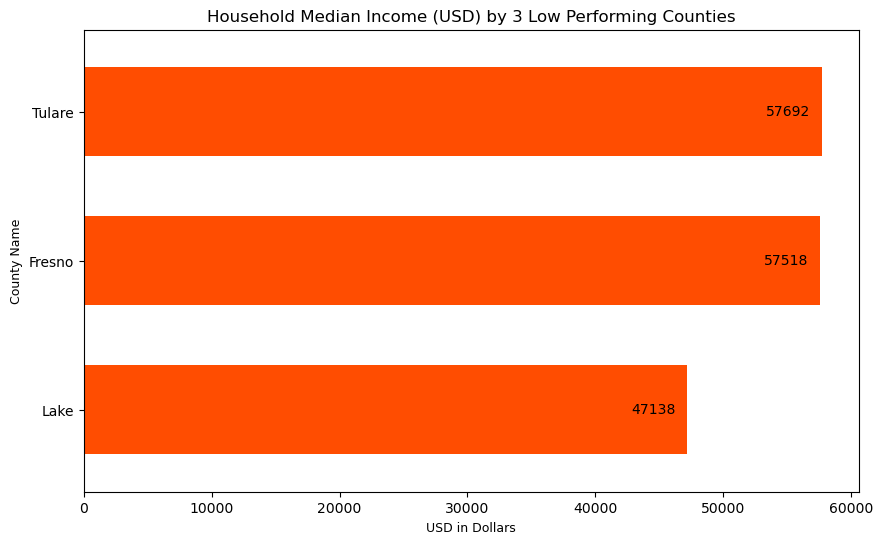

In [11]:
# Create a barchart
# Reference: https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
df3_chart = df_3.plot(x='county',
                      y='household_median_income_2019',                      
                      kind='barh', 
                      legend=False,
                      width=0.6,
                      figsize = (10, 6),
                      color='#ff4d01') 
plt.title('Household Median Income (USD) by 3 Low Performing Counties')  
plt.xlabel('USD in Dollars', fontsize=9)
plt.ylabel('County Name', fontsize=9)
df3_chart.bar_label(df3_chart.containers[0], label_type='edge', padding=-40);

The geographical chart of household median income levels by California County was created in Tableau. 

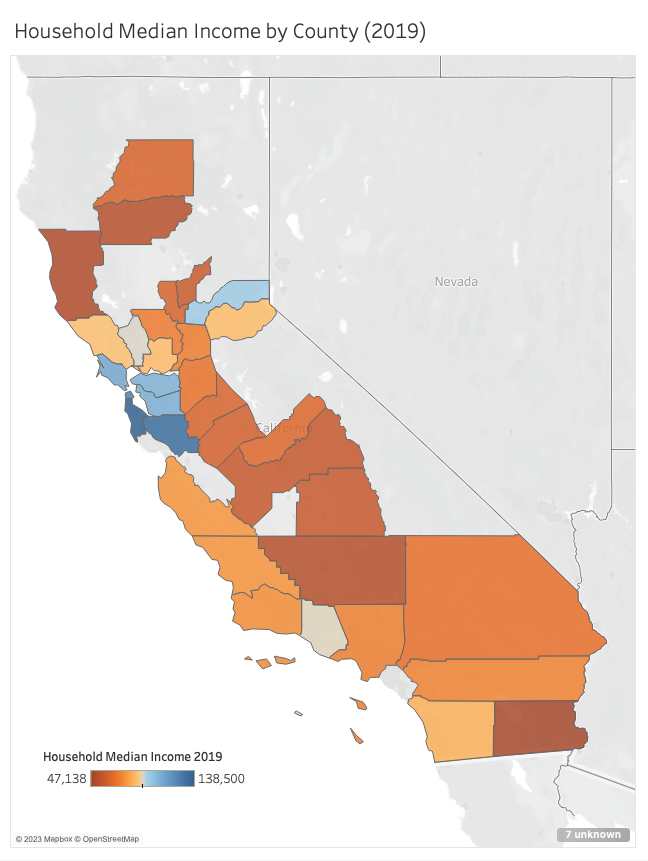

#### Correlation between ACT & SAT Features and Household Income 

By using ACT & SAT datasets, the below heatmap was created to examine the correlation between ACT and SAT test performance and household income by county using US Census data. While income level is not the largest factor, there does appear to be some correlation between exam performance and income levels in California. For example, the average scores in Math, Science, English, and Reading on the ACT exam had a correlation of r=0.31-0.35 to the household median income. Additionally, the percentage of benchmark for Math and both sections on the SAT exam had a correlation of r=0.29 to the household median income.

In [12]:
# Read in data & merge with US census data
act = pd.read_csv('../data/act_2019_ca_clean.csv')
act_new = act.merge(df, left_on='county', right_on='county')
act_new.head()

,Unnamed: 0,school,district,county,num_of_testtakers,avg_score_reading,avg_score_english,avg_score_math,avg_score_science,num_testtakers_compositescr_21_and_up,pct_testtakers_compositescr_21_and_up,household_median_income_2019
0,3,Abraham Lincoln High,San Jose Unified,Santa Clara,53.0,23.0,22.0,22.0,23.0,34.0,64.15,133076
1,18,ACE Charter High,East Side Union High,Santa Clara,34.0,14.0,14.0,15.0,15.0,1.0,2.94,133076
2,21,Adrian Wilcox High,Santa Clara Unified,Santa Clara,138.0,25.0,24.0,24.0,24.0,93.0,67.39,133076
3,71,Andrew P. Hill High,East Side Union High,Santa Clara,26.0,23.0,22.0,23.0,23.0,17.0,65.38,133076
4,82,Ann Sobrato High,Morgan Hill Unified,Santa Clara,83.0,25.0,24.0,25.0,24.0,69.0,83.13,133076


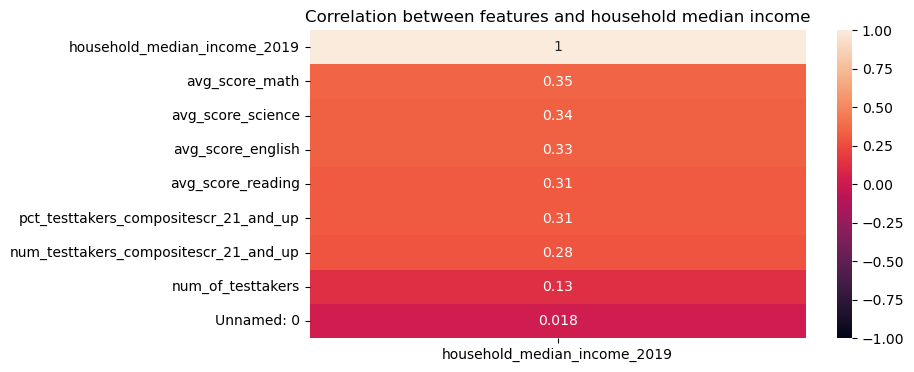

In [13]:
# Display the correlation with'household_median_income_2019'  
act_new_corr = act_new.corr()[['household_median_income_2019']].sort_values(by='household_median_income_2019', 
                                                           ascending=False)
# Creating a heatmap
plt.figure(figsize = (8, 4))
sns.heatmap(act_new_corr, annot = True, vmin = -1, vmax = 1)
plt.title('Correlation between features and household median income');

In [14]:
# Read in data & merge with US census data
sat = pd.read_csv('../data/sat_2019_ca_clean.csv')
sat_new = sat.merge(df, left_on='county', right_on='county')
sat_new.head()

,Unnamed: 0,school,district,county,num_of_testtakers,num_benchmark_reading_writing,pct_benchmark_reading_writing,num_benchmark_math,pct_benchmark_math,num_benchmark_both,pct_benchmark_both,household_median_income_2019
0,2,Belmont Senior High,Los Angeles Unified,Los Angeles,102.0,31.0,30.39,14.0,13.73,14.0,13.73,72797
1,3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,113.0,54.0,47.79,18.0,15.93,18.0,15.93,72797
2,5,Foshay Learning Center,Los Angeles Unified,Los Angeles,106.0,68.0,64.15,36.0,33.96,36.0,33.96,72797
3,9,New Open World Academy K-12,Los Angeles Unified,Los Angeles,68.0,17.0,25.00,6.0,8.82,6.0,8.82,72797
4,13,Animo Inglewood Charter High,Inglewood Unified,Los Angeles,68.0,45.0,66.18,30.0,44.12,29.0,42.65,72797


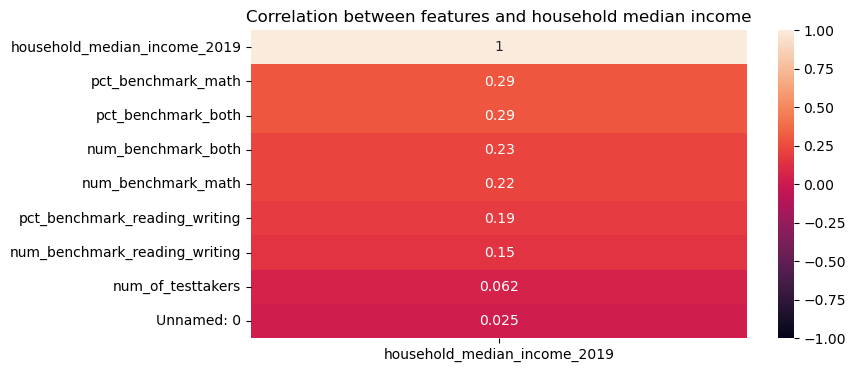

In [15]:
# Display the correlation with'household_median_income_2019'  
sat_new_corr = sat_new.corr()[['household_median_income_2019']].sort_values(by='household_median_income_2019', 
                                                           ascending=False)
# Creating a heatmap
plt.figure(figsize = (8, 4))
sns.heatmap(sat_new_corr, annot = True, vmin = -1, vmax = 1)
plt.title('Correlation between features and household median income');

## Conclusion and Recommendations

* While income level is not the laregst factor, there appears to be some correlation between exam performance and income levels in California."
* Among the counties that performed poorly on the ACT and SAT exams, Lake, Fresno, and Tulare stood out as having particularly low median household incomes. 


## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|county|object|US Census|County Name|
|household_median_income_2019|int64|US Census|Household Median Income by California County (2019)|
